<a href="https://colab.research.google.com/github/Ridah99/Data-Science-Projects/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Credit Card Fraud Detection using Machine Learning</h1>

<h2 style="text-align: center;">Import Neccessary Libraries</h2>




In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 86% 57.0M/66.0M [00:00<00:00, 594MB/s]
100% 66.0M/66.0M [00:00<00:00, 530MB/s]


In [7]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [145]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier, IsolationForest, StackingClassifier

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,
precision_recall_curve, average_precision_score)

<h2 style="text-align: center;">Data Preprocessing</h2>

#### Steps to prepare the credit card fraud dataset:
##### 1. Load the creditcard.csv dataset into a DataFrame.
##### 2. Check for and handle any missing/null values.
##### 3. Identify and remove duplicate records to avoid data leakage.



In [146]:
# Read creditcard.csv into a pandas dataframe
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
# Print the shape of the dataframe
df.shape

(284807, 31)

In [148]:
# Print the dataframe's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [149]:
# Print the amount of null values in the dataframe
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [150]:
# Check for duplicated values in the dataframe
df.duplicated().any()

np.True_

In [151]:
# Print the sum of the duplicated values
df.duplicated().sum()

np.int64(1081)

In [152]:
# Removes the duplicated values in the dataframe
df = df.drop_duplicates()

In [153]:
# Print the shape of the dataframe
df.shape

(283726, 31)

<h2 style="text-align: center;">Data Visualization</h2>



#### Plot the following distributions:
##### 1. Normal vs fraudulent transactions to visualize the class imbalance in the dataset
##### 2. Fraud transactions over time (hours elapsed since the first transaction) to show when fraudulent activity is most frequent
##### 3. Transaction amount by class to show the difference in the amount range for fraud vs normal transactions

In [154]:
# Print the unique values in class column
df['Class'].unique()

array([0, 1])

In [155]:
# Print the value count for the class column
df['Class'].value_counts()

,count
Class,
0,283253
1,473


In [156]:
# Convert Time (seconds) to hours
df['Hours'] = df['Time'].apply(lambda x: x/ 3600)

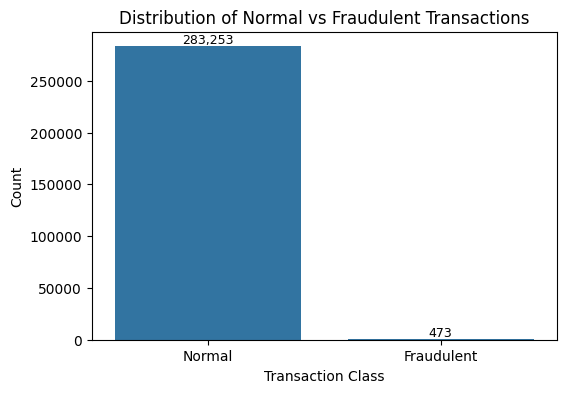

In [157]:
# Plot the distribution of normal vs fraudulent transactions
# Add value labels to show the exact count per class

plt.figure(figsize = (6, 4))
normal_vs_fraud_plot = sns.countplot(x = 'Class', data = df)

# Add the count labels aboves bar
for patch in normal_vs_fraud_plot.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.01, f'{int(height):,}', ha = 'center', va = 'bottom', fontsize = 9)

plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.xticks([0, 1], ['Normal', 'Fraudulent'])
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

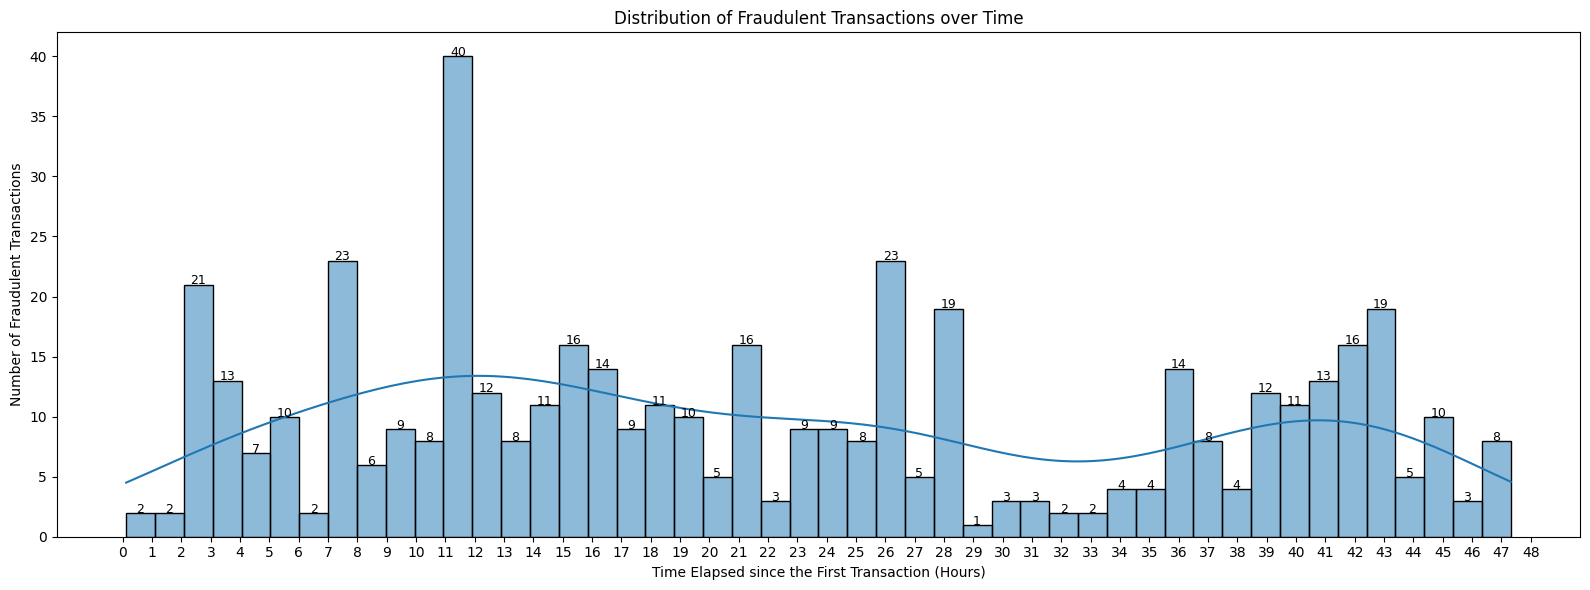

In [158]:
# Plot the distribution of fradulent transactions over time
# Convert Time (seconds) to hours elapsed since the first transaction
# Filter fraud transactions and plot distribution over time
# Add value labels to show the exact amount of fraud cases in each hour

# Filter fraud transactions
fraud_df = df[df['Class'] == 1]

# Plot the histogram
plt.figure(figsize = (16, 6))
fraud_over_time_plot = sns.histplot(fraud_df, x = 'Hours', bins = 48, kde = True)

# Add count labels above bars
for patch in fraud_over_time_plot.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.01, int(height), ha ='center', fontsize = 9)

plt.title('Distribution of Fraudulent Transactions over Time')
plt.xlabel('Time Elapsed since the First Transaction (Hours)')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 49))
plt.tight_layout()
plt.show()

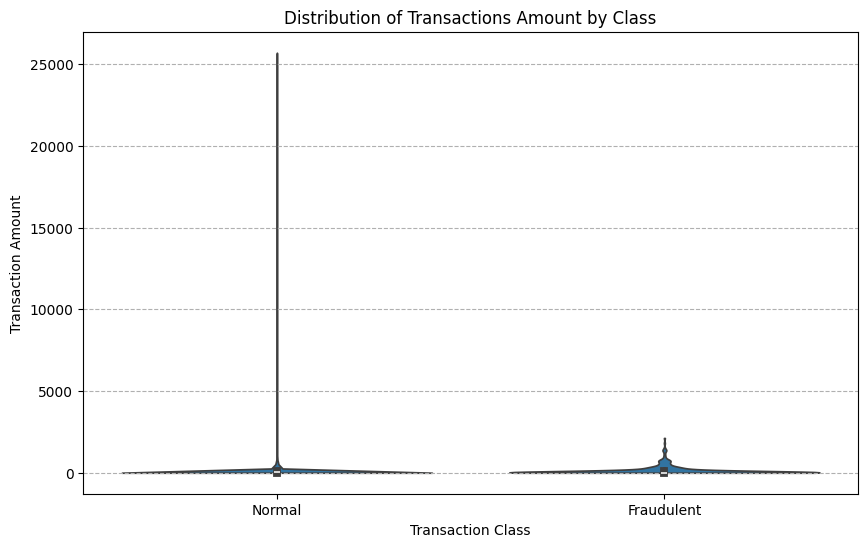

In [159]:
# Plot the distribution of transaction amount by class

plt.figure(figsize = (10, 6))
transactions_by_amount_plot = sns.violinplot(x = 'Class', y = 'Amount', data = df, cut = 0, scale = 'width', inner = 'box')
plt.title('Distribution of Transactions Amount by Class')
plt.xticks([0, 1], ['Normal', 'Fraudulent'])
plt.xlabel('Transaction Class')
plt.ylabel('Transaction Amount')
plt.grid(axis ='y', linestyle= '--')
plt.show()

<h2 style="text-align: center;">Model Development</h2>

#### The following was done to train, test and evaluate the models
##### 1. Normalize the Time and Amount features using StandardScaler to ensure they are on the same scale as the other PCA-transformed features.
##### 2. Separate features (x) and target variable (y), then split into training and testing sets
##### 3. Apply sampling techniques to handle class imbalance:
#####       - Random Under Sampling (RUS): This method randomly remove samples from the majority class to balance the class distribution
#####       - Random Over Sampling (ROS): This method randomly duplicating samples from the minority class to balance the class distribution
#####       - Synthetic Minority Oversampling Technique (SMOTE): This method generates synthetic samples for the minority class to balance the class imbalance
##### 4. Train the following models on each sampled dataset:
#####       - Logistic Regression (LR)
#####       - Decision Tree (DT)
#####       - Random Forest (RF)
#####       - XGBoost (XGB)
#####       - Stacking Ensemble Model: Combines Random Forest and XGBoost with Logistic Regression as meta-learner
#####       - Multi-layer Perceptron (MLP)
#####       - Isolation Forest (unsupervised anomaly detection)
##### 5. Evaluate model performance using:
#####       - Classification report (precision, recall, F1-score)
#####       - Confusion matrix
#####       - ROC curve and AUC score
#####       - Precision-Recall curve
#####       - Average precision score


##### Note: Overfitting was observed in all models trained on ROS and SMOTE apart from Isolation Forest (Unsupervised) and Logistic Regression (supervised), while RUS produced more balanced performance.

In [160]:
# Normalize the values in the Amount, Time and Hours Column column using standardscaler

df[['Amount', 'Time']] = StandardScaler().fit_transform(df[['Amount', 'Time']])

In [161]:
# Spilt the features (independent variables) and target variable (dependent variable)

x = df.drop(['Class', 'Hours'], axis = 1)
y = df['Class']

<h3 style="text-align: center;">Random Under Sampling</h3>

In [162]:
# Initialize RandomUnderSampler

RUS = RandomUnderSampler(random_state = 42)

In [163]:
# Apply RandomUnderSampler

x_under_sampled, y_under_sampled = RUS.fit_resample(x, y)

In [164]:
# Convert the resampled arrays back to a dataframe and series

x_under_sampled = pd.DataFrame(x_under_sampled, columns = x.columns)
y_under_sampled = pd.Series(y_under_sampled, name = 'Class')

In [165]:
# Print the value_count of the under_sampled series

y_under_sampled.value_counts()

,count
Class,
0,473
1,473


In [166]:
# Spilt the data into the training and testing set using train_test_spilt

x_train, x_test, y_train, y_test = train_test_split(x_under_sampled, y_under_sampled, test_size = 0.2, random_state = 42)

In [167]:
# Defines a dictionary of classification models along with their hyperparameters for GridSearchCV during training and evaluation.

def get_models():
    models = dict()

    models['Decision_Tree'] = {
        'model': DecisionTreeClassifier(random_state = 42),
        'params': {
            'max_depth': [3, 5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    }

    models['Logistic_Regression'] = {
        'model': LogisticRegression(solver = 'liblinear', max_iter = 1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    }

    models['Random_Forest'] = {
        'model': RandomForestClassifier(random_state = 42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    }

    models['XGBoost'] = {
        'model': XGBClassifier(use_label_encoder = False, eval_metric = 'logloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }

    base_learners = [
        ('Random_Forest', RandomForestClassifier(n_estimators = 100, random_state = 42)),
        ('XGBoost', XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')),
    ]

    final_estimator = LogisticRegression(max_iter = 1000)

    models['Stacked_Model'] = {

        'model': StackingClassifier(estimators = base_learners, final_estimator = final_estimator, cv = 5, n_jobs = -1),
        'params': {} # No hyperparameter tuning applied to stacking models
    }

    return models

In [168]:
# Function to train, evaluate and save the traditonal machine learning models

def evaluate_models(x_train, y_train, x_test, y_test, save_dir ='saved_models'):
    models = get_models()
    results =[]

    for name, mp in models.items():
        print(f'\nModel Name: {name}')

        if mp['params']:
            grid = GridSearchCV(mp['model'], mp['params'], scoring = 'roc_auc', cv = 5, n_jobs = -1)
            grid.fit(x_train, y_train)
            best_model = grid.best_estimator_
            print('Best Parameters:', grid.best_params_)

        else:
            best_model = mp['model'].fit(x_train, y_train)
            best_params = None
            print('No hyperparameter tuning applied.')

        y_pred = best_model.predict(x_test)
        y_probs = best_model.predict_proba(x_test)[:, 1] if hasattr(best_model, "predict_proba") else y_pred

        # Classification Report
        print('\n Classification Report:')
        print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels = ['Normal', 'Fraud'])
        plt.title(f'{name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label = f'AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

        print(f'AUC Score: {auc_score:.2f}')

        # Precision-Recall Curve and Average Precision
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        avg_precision = average_precision_score(y_test, y_probs)

        # Plot the Precision-Recall Curve
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{name} - Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()

        print(f'Average Precision (PR-AUC): {avg_precision:.2f}')

In [169]:
# Function to train, evaluate and save isolation forest model

def isolation_forest_model(x_train, x_test, y_test, save_dir = 'saved_models'):
    model = IsolationForest(random_state = 42)

    # Fit the model on the training data
    model.fit(x_train)

    # Predict the anomalies
    y_pred = model.predict(x_test)

    # Convert anomalies to 1 (fraud), normal to 0
    y_pred = np.where(y_pred == -1, 1, 0)

    labels = ['Normal', 'Fraud']

    # Printing the classification report
    print('Model: Isolation_Forest')
    print('Classification Report:')
    print(classification_report(y_test, y_pred, target_names = labels))

    # Print confusion matrix
    cnn_cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (10, 8))
    sns.heatmap(cnn_cm, annot = True, fmt = "d", cmap = "Blues", cbar = True,
                xticklabels = labels, yticklabels = labels)
    plt.title(f'Isolation_Forest Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Get the anomaly scores from the Isolation Forest model
    y_scores = -model.decision_function(x_test)

    # Compute the AUC score
    roc_auc = roc_auc_score(y_test, y_scores)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve for Isolation Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

    # Precision-Recall Curve and Average Precision
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    avg_precision = average_precision_score(y_test, y_scores)

    # Plot the Precision-Recall Curve
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

    print(f'Average Precision (PR-AUC): {avg_precision:.2f}')

In [170]:
# Function to train, evaluate and save an MLP model

def build_mlp(x_train, y_train, x_test, y_test):

    # Clears the background session before training a new model

    tf.keras.backend.clear_session()

    # Input shape for the MLP model

    input_shape = (x_train.shape[1],)

    model = Sequential([

        Dense(64, kernel_regularizer=l2(0.001), activation = 'relu', input_shape = input_shape),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation = 'relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation = 'relu'),
        Dense(1, activation = 'sigmoid')

    ])

    model.compile(optimizer = Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])


    history = model.fit(

        x_train,
        y_train,
        epochs = 30,
        batch_size = 256,
        validation_split = 0.1,
        verbose = 2
    )

    y_pred = model.predict(x_test).flatten()
    y_preds = (y_pred > 0.5).astype(int)

    # Printing the classification report
    print(classification_report(y_test, y_preds, target_names = ['Normal','Fraud']))

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap ='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
    plt.title('MLP Classifier - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Compute the AUC score
    roc_auc = roc_auc_score(y_test, y_pred)

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label = f'ROC-AUC = {roc_auc:.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Precision-Recall Curve and Average Precision
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)

    # Plot the Precision-Recall Curve
    plt.plot(recall, precision, label=f'AP={ap:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    return model, history


Model Name: Decision_Tree
Best Parameters: {'max_depth': 3, 'min_samples_split': 10}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.95      0.90        88
       Fraud       0.96      0.86      0.91       102

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



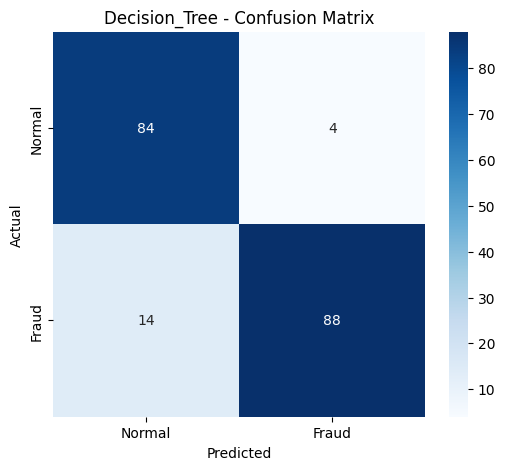

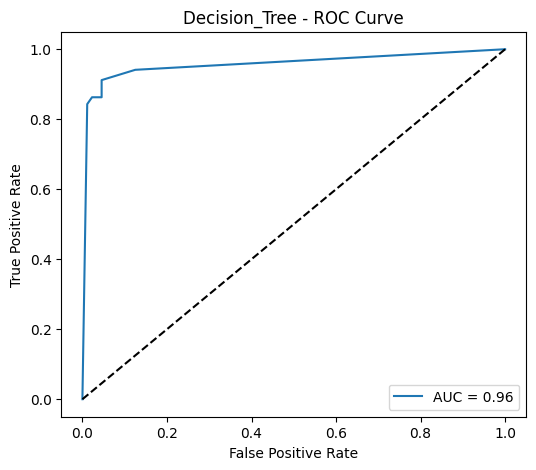

AUC Score: 0.96


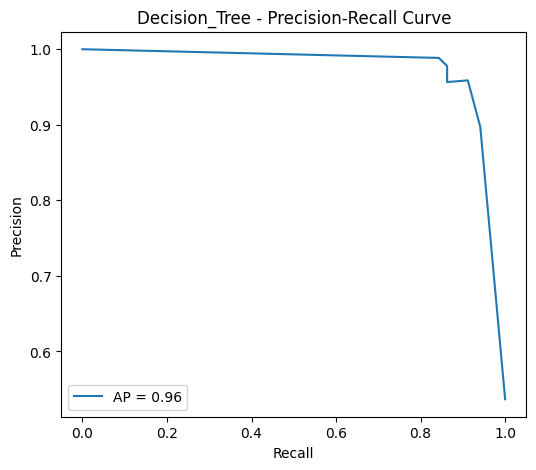

Average Precision (PR-AUC): 0.96

Model Name: Logistic_Regression
Best Parameters: {'C': 0.01, 'penalty': 'l2'}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93        88
       Fraud       0.96      0.92      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



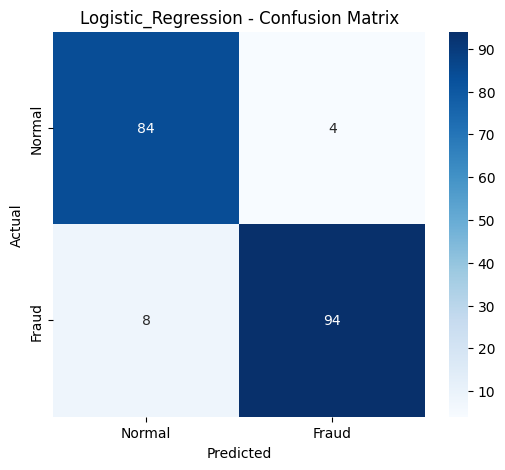

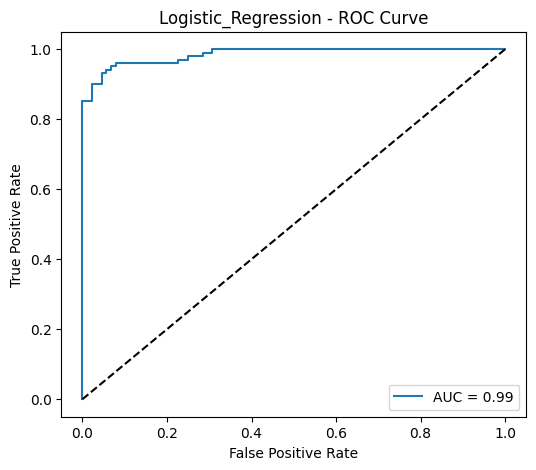

AUC Score: 0.99


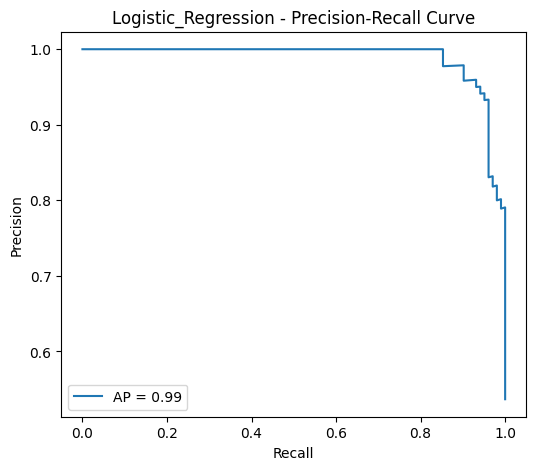

Average Precision (PR-AUC): 0.99

Model Name: Random_Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.99      0.94        88
       Fraud       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190



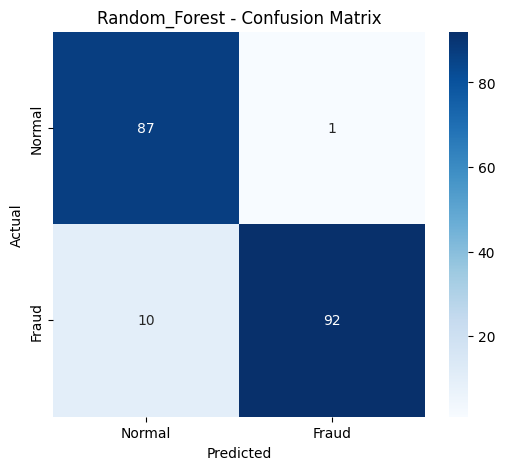

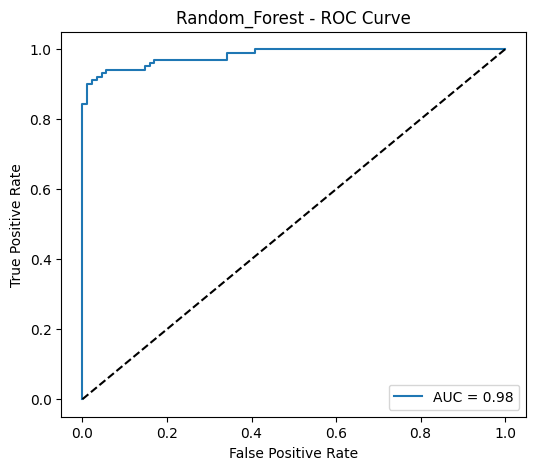

AUC Score: 0.98


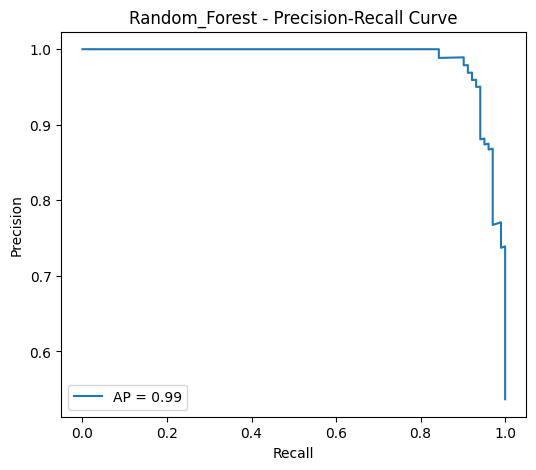

Average Precision (PR-AUC): 0.99

Model Name: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.98      0.93        88
       Fraud       0.98      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



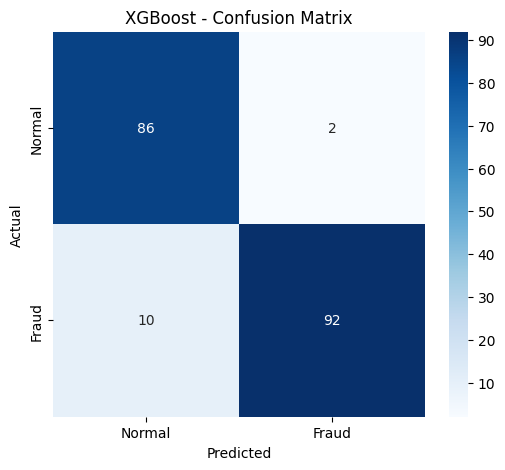

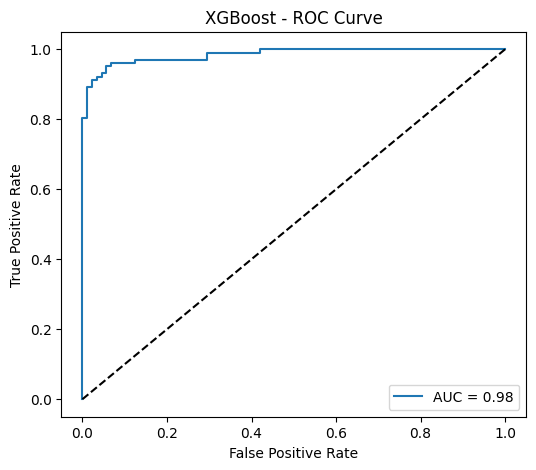

AUC Score: 0.98


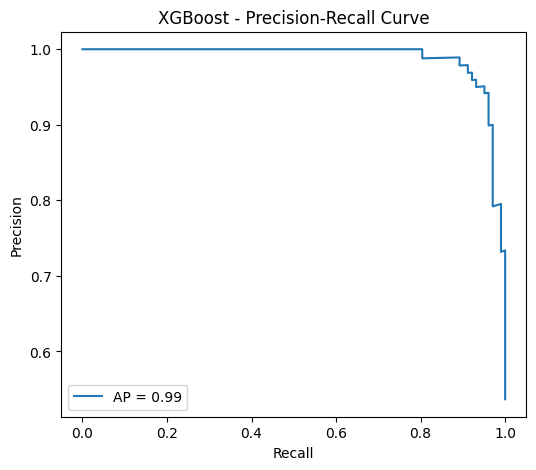

Average Precision (PR-AUC): 0.99

Model Name: Stacked_Model
No hyperparameter tuning applied.

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.99      0.94        88
       Fraud       0.99      0.90      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.95      0.94      0.94       190



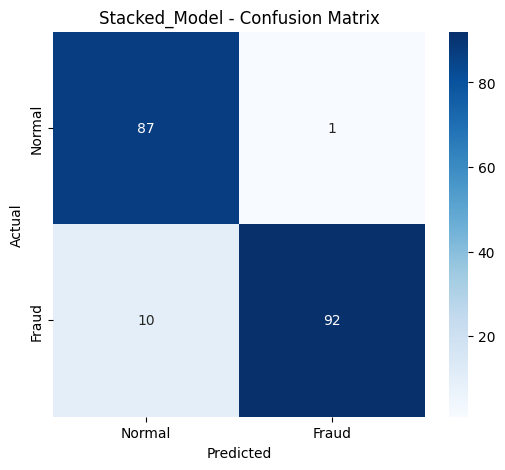

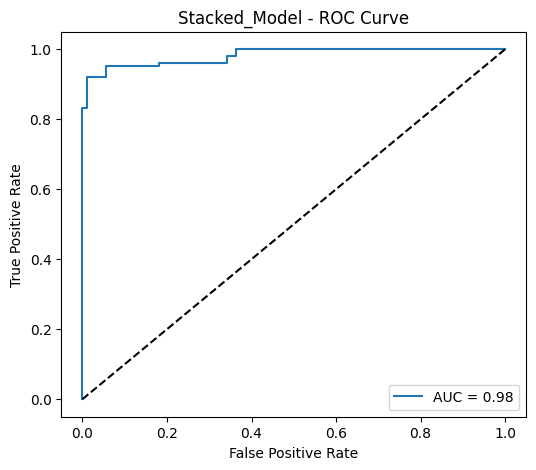

AUC Score: 0.98


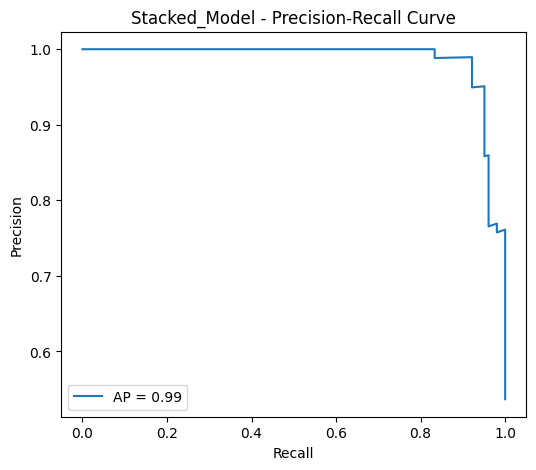

Average Precision (PR-AUC): 0.99


In [171]:
# Apply the function evaluate_models to the under_sampled data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.53      0.99      0.69        88
       Fraud       0.96      0.25      0.39       102

    accuracy                           0.59       190
   macro avg       0.75      0.62      0.54       190
weighted avg       0.76      0.59      0.53       190



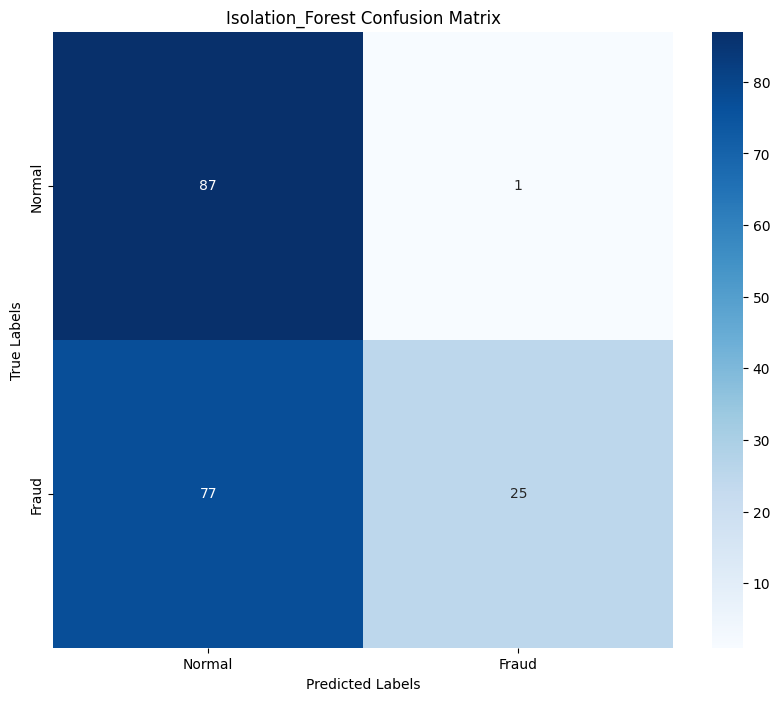

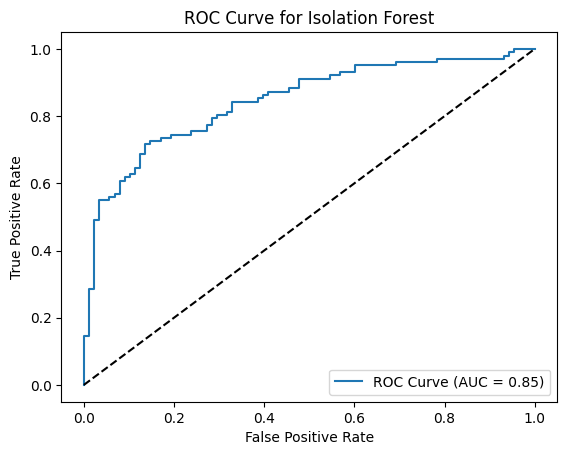

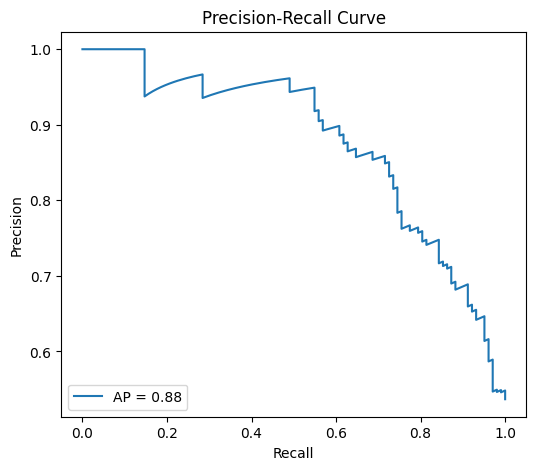

Average Precision (PR-AUC): 0.88


In [172]:
# Apply the function isolation_forest_model to the under_sampled data
isolation_forest_model(x_train, x_test, y_test)

Epoch 1/30
3/3 - 5s - 2s/step - accuracy: 0.4338 - loss: 0.9676 - val_accuracy: 0.5000 - val_loss: 1.0944
Epoch 2/30
3/3 - 0s - 88ms/step - accuracy: 0.5074 - loss: 0.8749 - val_accuracy: 0.4868 - val_loss: 0.8638
Epoch 3/30
3/3 - 0s - 101ms/step - accuracy: 0.6147 - loss: 0.7826 - val_accuracy: 0.6974 - val_loss: 0.7162
Epoch 4/30
3/3 - 0s - 67ms/step - accuracy: 0.6691 - loss: 0.6983 - val_accuracy: 0.7763 - val_loss: 0.6271
Epoch 5/30
3/3 - 0s - 63ms/step - accuracy: 0.7324 - loss: 0.6282 - val_accuracy: 0.8026 - val_loss: 0.5797
Epoch 6/30
3/3 - 0s - 106ms/step - accuracy: 0.7765 - loss: 0.6057 - val_accuracy: 0.7895 - val_loss: 0.5497
Epoch 7/30
3/3 - 0s - 82ms/step - accuracy: 0.8044 - loss: 0.5485 - val_accuracy: 0.8553 - val_loss: 0.5275
Epoch 8/30
3/3 - 0s - 88ms/step - accuracy: 0.8309 - loss: 0.5062 - val_accuracy: 0.8553 - val_loss: 0.5079
Epoch 9/30
3/3 - 0s - 47ms/step - accuracy: 0.8676 - loss: 0.4709 - val_accuracy: 0.8553 - val_loss: 0.4893
Epoch 10/30
3/3 - 0s - 46ms/

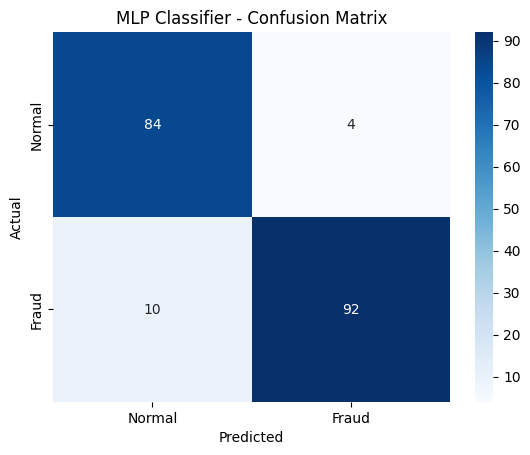

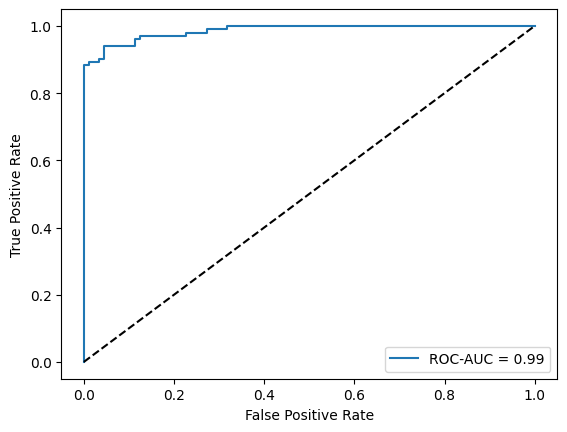

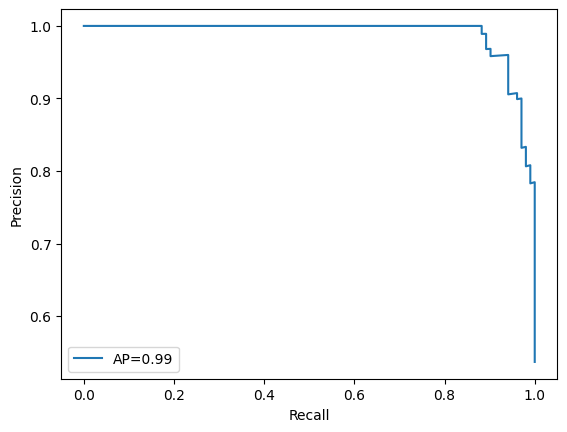

(<Sequential name=sequential, built=True>,
 <keras.src.callbacks.history.History at 0x7efade649610>)

In [173]:
# Apply the function build_mlp to the under_sampled data
mlp_model, mlp_history = build_mlp(x_train, y_train, x_test, y_test)
mlp_model, mlp_history

<h3 style="text-align: center;">Random Over Sampling</h3>

In [174]:
# Initialize RandomOverSampler
ROS = RandomOverSampler(random_state = 42)

In [175]:
# Apply RandomOverSampler
x_over_sampled, y_over_sampled = ROS.fit_resample(x, y)

In [176]:
# Convert the resampled arrays back to a dataframe and series
x_over_sampled = pd.DataFrame(x_over_sampled, columns = x.columns)
y_over_sampled = pd.Series(y_over_sampled, name = 'Class')

In [177]:
# Print the value_count of the over_sampled series
y_over_sampled.value_counts()

,count
Class,
0,283253
1,283253


In [178]:
# Spilt the data into the training and testing set using train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(x_over_sampled, y_over_sampled, test_size = 0.2, random_state = 42)


Model Name: Decision_Tree
Best Parameters: {'max_depth': None, 'min_samples_split': 2}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



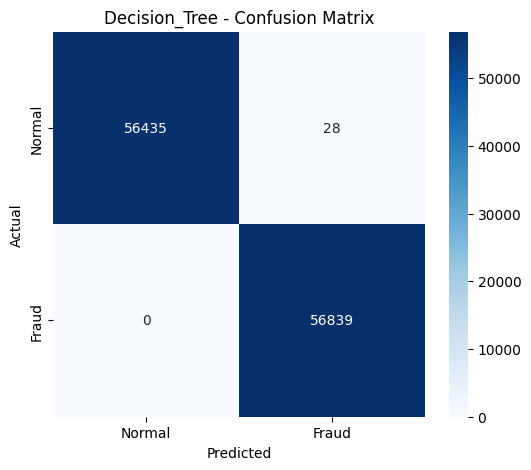

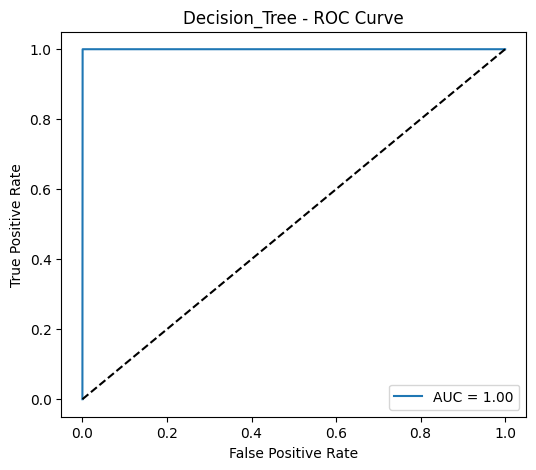

AUC Score: 1.00


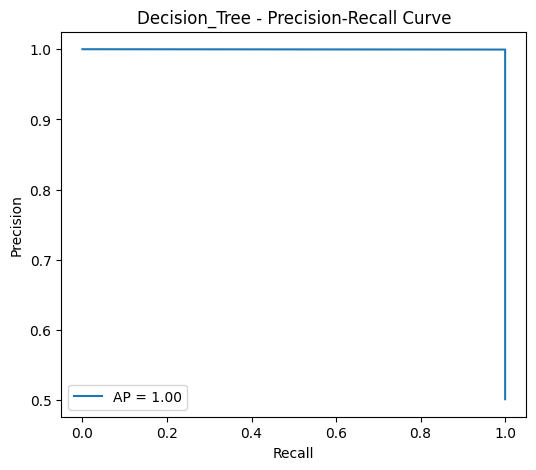

Average Precision (PR-AUC): 1.00

Model Name: Logistic_Regression
Best Parameters: {'C': 10, 'penalty': 'l2'}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.98      0.95     56463
       Fraud       0.98      0.92      0.95     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



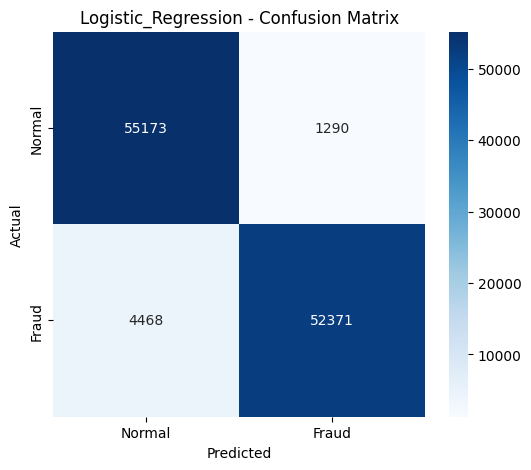

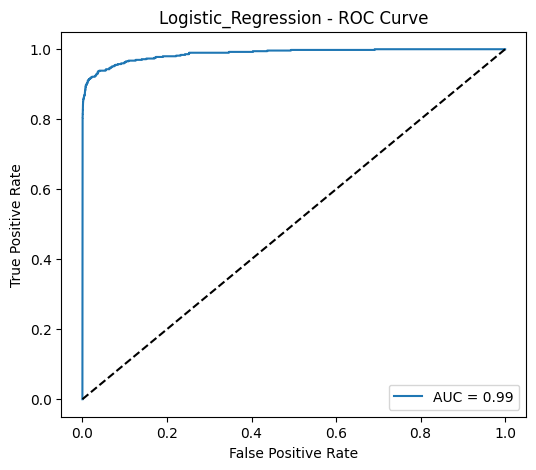

AUC Score: 0.99


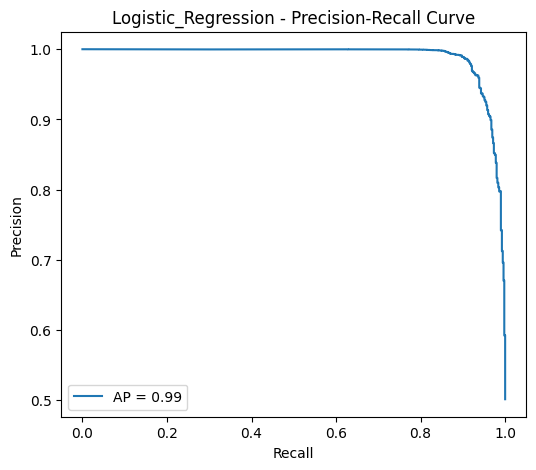

Average Precision (PR-AUC): 0.99

Model Name: Random_Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



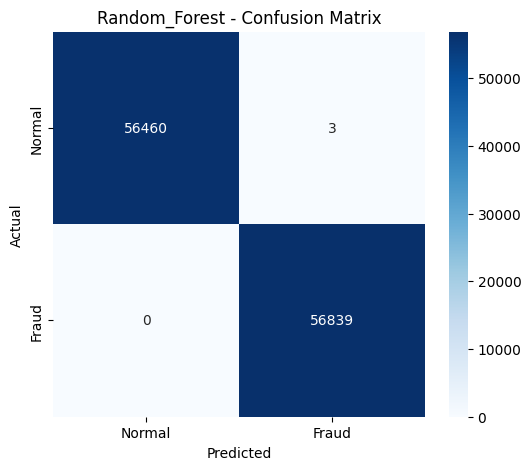

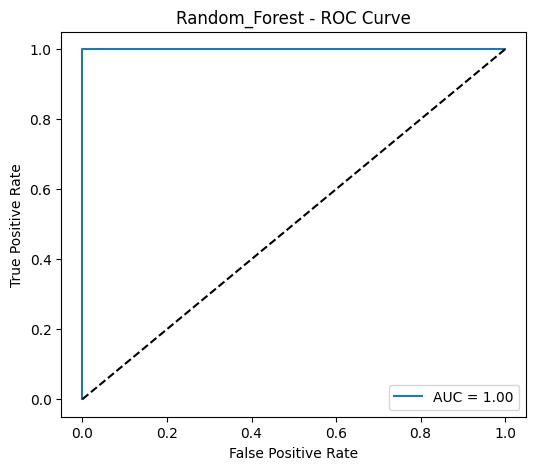

AUC Score: 1.00


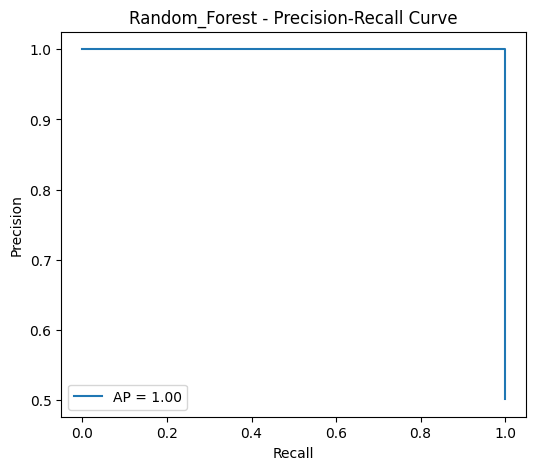

Average Precision (PR-AUC): 1.00

Model Name: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



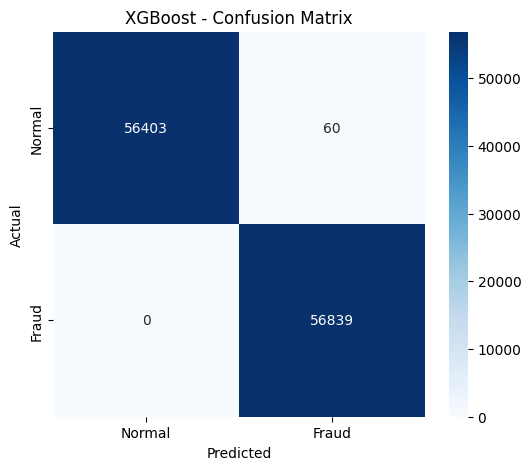

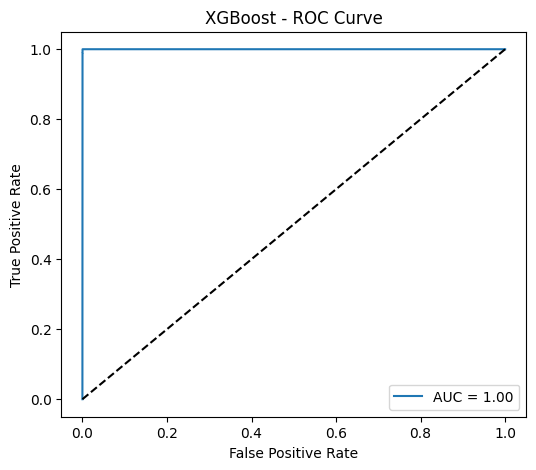

AUC Score: 1.00


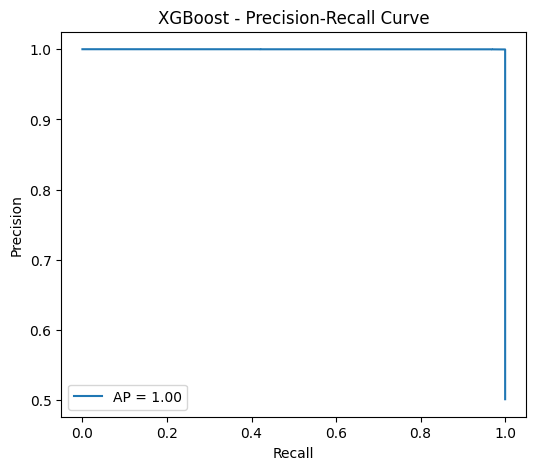

Average Precision (PR-AUC): 1.00

Model Name: Stacked_Model
No hyperparameter tuning applied.

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



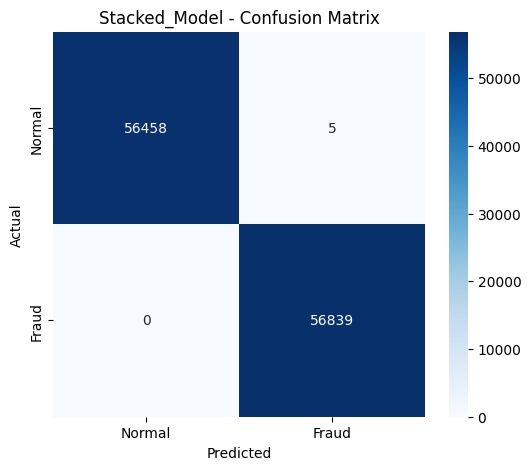

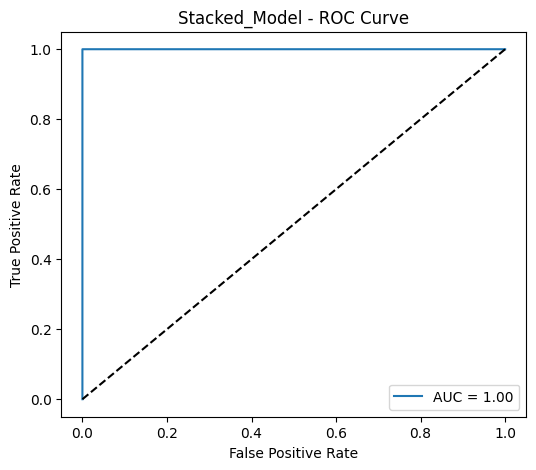

AUC Score: 1.00


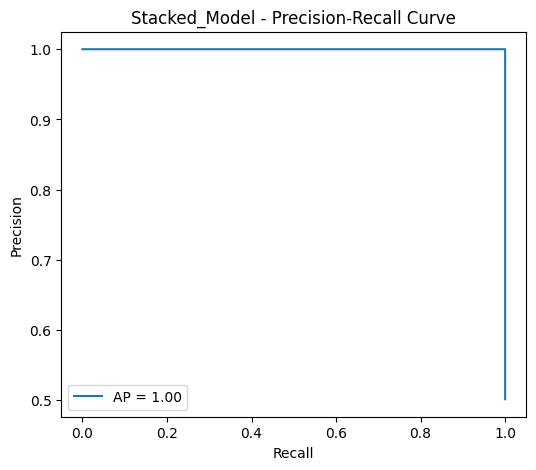

Average Precision (PR-AUC): 1.00


In [179]:
# Apply the function evaluate_models to the over_sampled data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.56      0.99      0.72     56463
       Fraud       0.96      0.24      0.38     56839

    accuracy                           0.61    113302
   macro avg       0.76      0.61      0.55    113302
weighted avg       0.76      0.61      0.55    113302



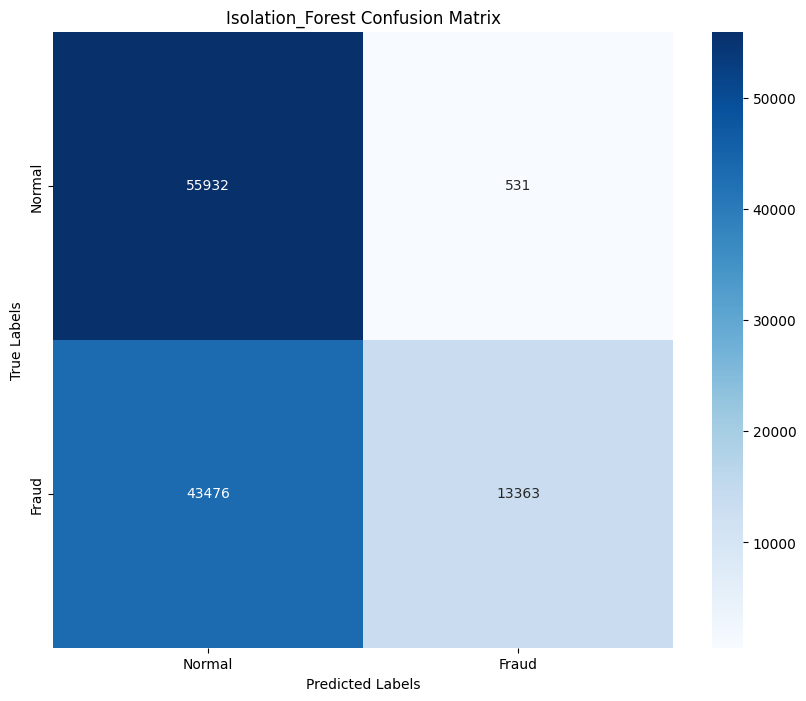

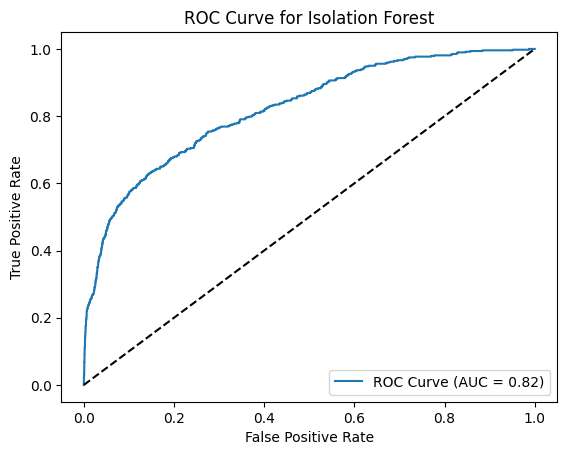

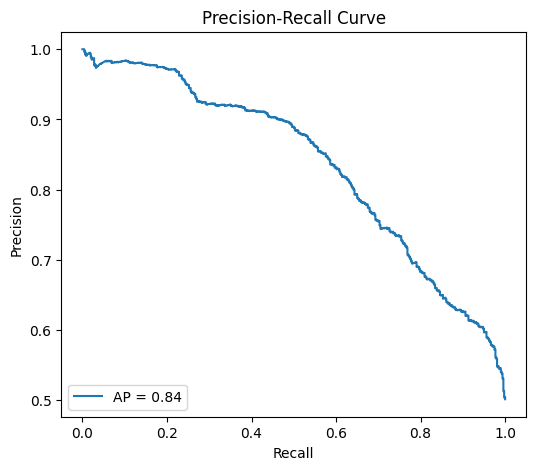

Average Precision (PR-AUC): 0.84


In [180]:
# Apply the function isolation_forest_model to the over_sampled data
isolation_forest_model(x_train, x_test, y_test)

Epoch 1/30
1594/1594 - 12s - 8ms/step - accuracy: 0.9646 - loss: 0.1106 - val_accuracy: 0.9957 - val_loss: 0.0289
Epoch 2/30
1594/1594 - 8s - 5ms/step - accuracy: 0.9904 - loss: 0.0392 - val_accuracy: 0.9977 - val_loss: 0.0191
Epoch 3/30
1594/1594 - 11s - 7ms/step - accuracy: 0.9937 - loss: 0.0291 - val_accuracy: 0.9986 - val_loss: 0.0149
Epoch 4/30
1594/1594 - 9s - 6ms/step - accuracy: 0.9947 - loss: 0.0252 - val_accuracy: 0.9985 - val_loss: 0.0148
Epoch 5/30
1594/1594 - 9s - 5ms/step - accuracy: 0.9951 - loss: 0.0238 - val_accuracy: 0.9986 - val_loss: 0.0138
Epoch 6/30
1594/1594 - 9s - 6ms/step - accuracy: 0.9955 - loss: 0.0228 - val_accuracy: 0.9985 - val_loss: 0.0149
Epoch 7/30
1594/1594 - 9s - 5ms/step - accuracy: 0.9959 - loss: 0.0215 - val_accuracy: 0.9989 - val_loss: 0.0132
Epoch 8/30
1594/1594 - 8s - 5ms/step - accuracy: 0.9960 - loss: 0.0213 - val_accuracy: 0.9988 - val_loss: 0.0130
Epoch 9/30
1594/1594 - 8s - 5ms/step - accuracy: 0.9960 - loss: 0.0212 - val_accuracy: 0.9989 

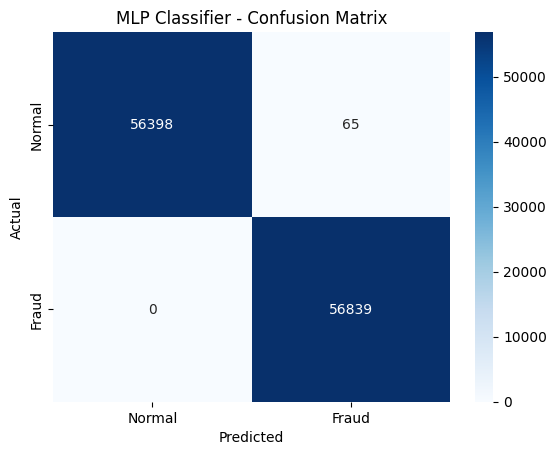

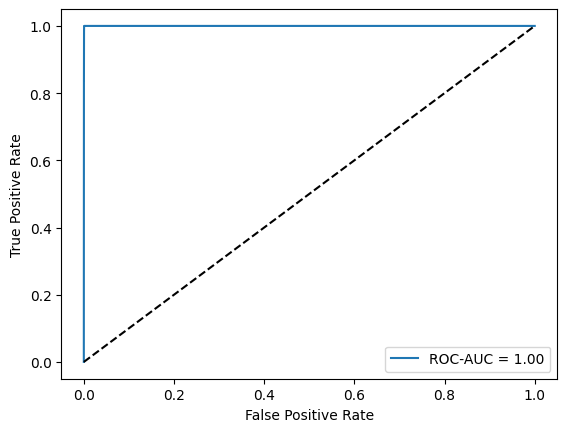

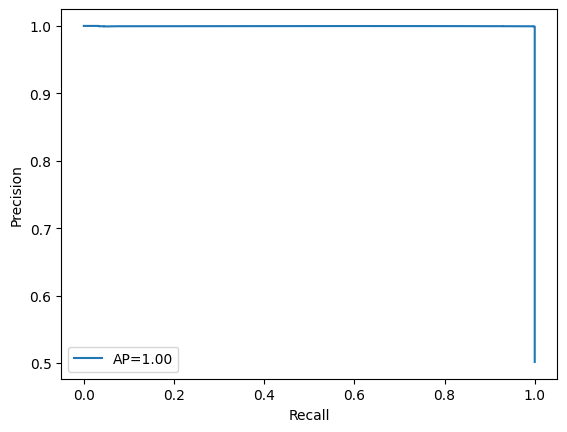

(<Sequential name=sequential, built=True>,
 <keras.src.callbacks.history.History at 0x7efadeb78250>)

In [181]:
# Apply the function build_mlp to the over_sampled data
mlp_model, mlp_history = build_mlp(x_train, y_train, x_test, y_test)
mlp_model, mlp_history

<h3 style="text-align: center;">SMOTE (Synthetic Minority Over Sampling)</h3>

In [182]:
# Initialize SMOTE
Smote = SMOTE(random_state = 42)

In [183]:
# Apply SMOTE
x_smote, y_smote = Smote.fit_resample(x, y)

In [184]:
# Convert the resampled arrays back to a dataframe and series
x_smote = pd.DataFrame(x_smote, columns = x.columns)
y_smote = pd.Series(y_smote, name = 'Class')

In [185]:
# Print the value count the smote series
y_smote.value_counts()

,count
Class,
0,283253
1,283253


In [186]:
# Spilt the data into the training and testing set using train_test_spilt
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)


Model Name: Decision_Tree
Best Parameters: {'max_depth': None, 'min_samples_split': 10}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



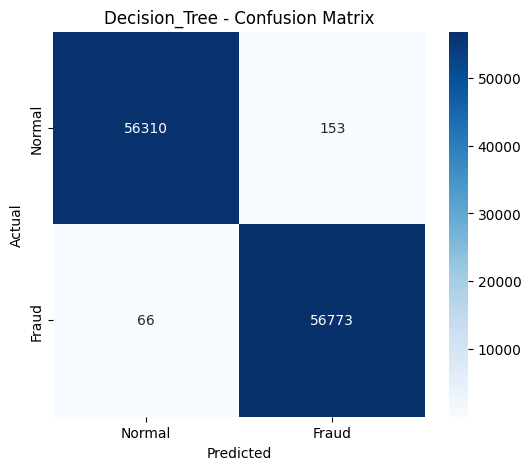

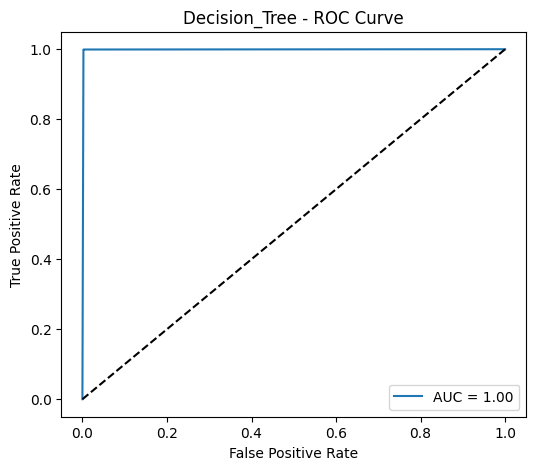

AUC Score: 1.00


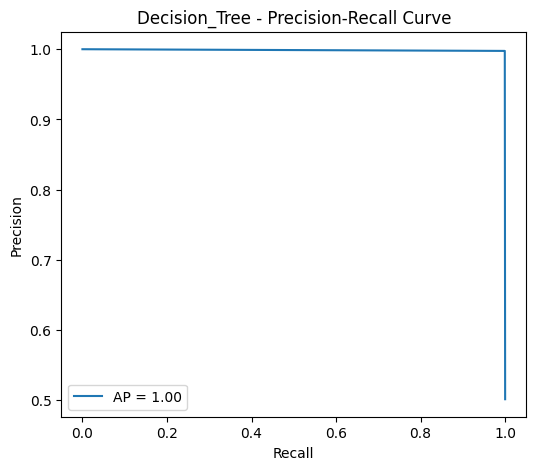

Average Precision (PR-AUC): 1.00

Model Name: Logistic_Regression
Best Parameters: {'C': 10, 'penalty': 'l2'}

 Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.97      0.95     56463
       Fraud       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



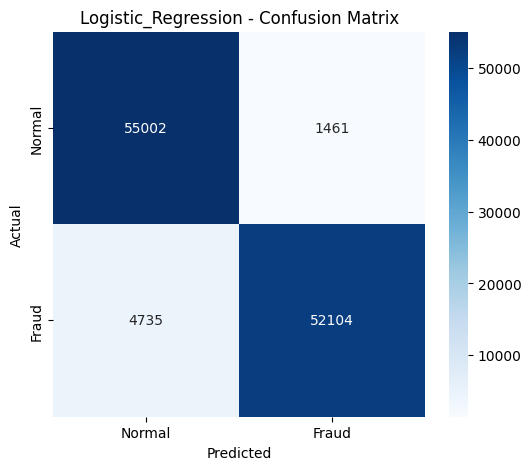

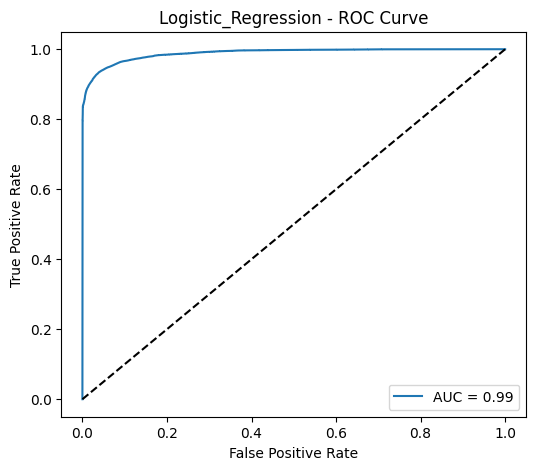

AUC Score: 0.99


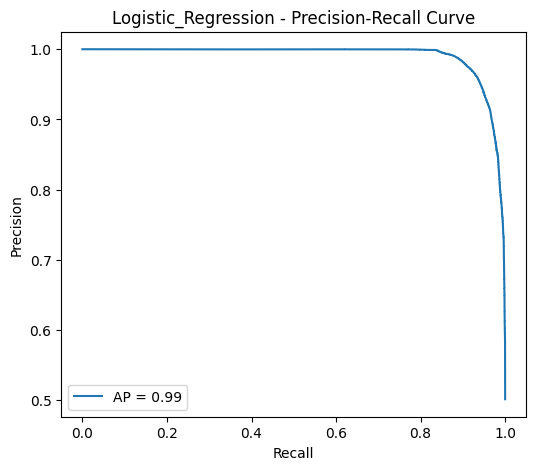

Average Precision (PR-AUC): 0.99

Model Name: Random_Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



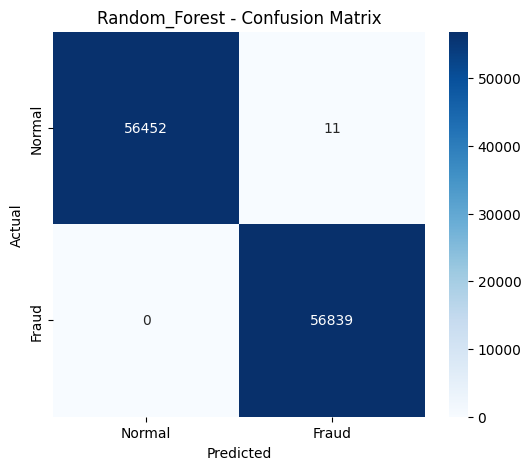

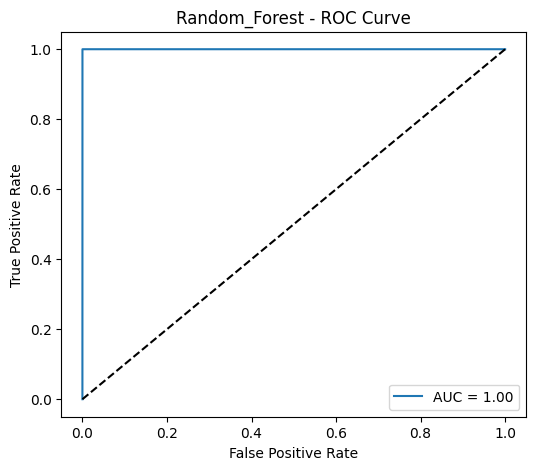

AUC Score: 1.00


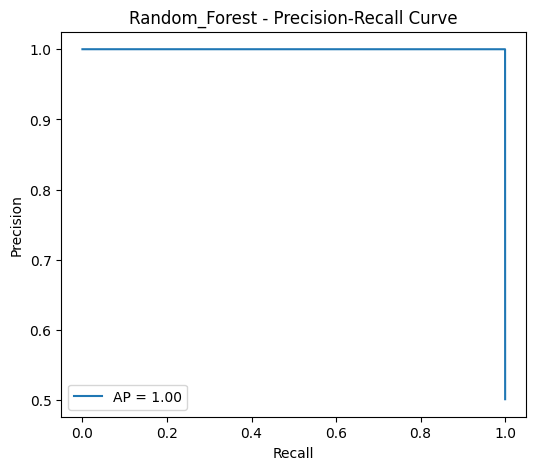

Average Precision (PR-AUC): 1.00

Model Name: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     56463
       Fraud       0.99      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



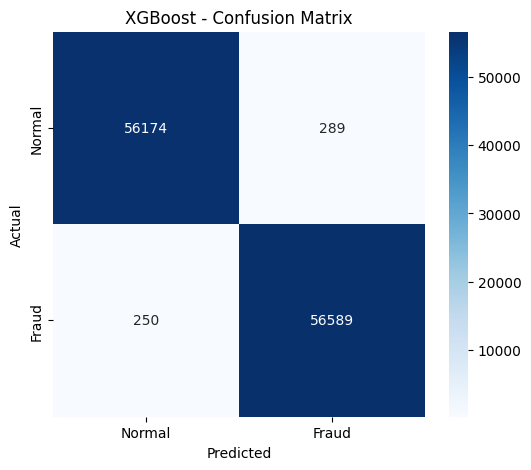

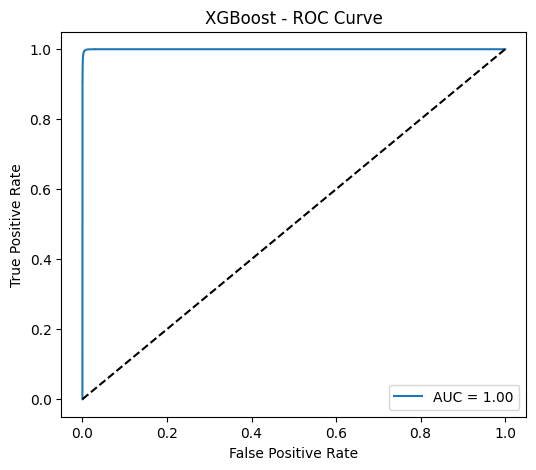

AUC Score: 1.00


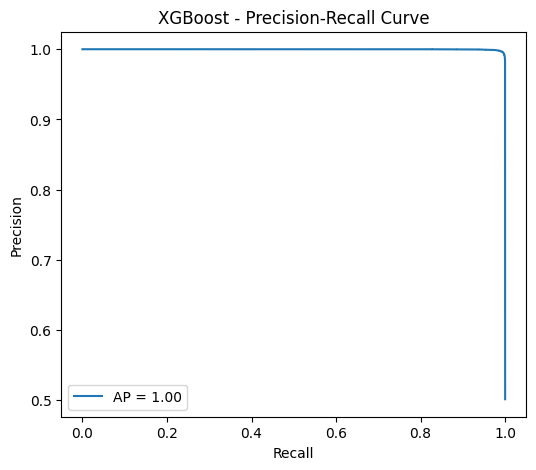

Average Precision (PR-AUC): 1.00

Model Name: Stacked_Model
No hyperparameter tuning applied.

 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56463
       Fraud       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



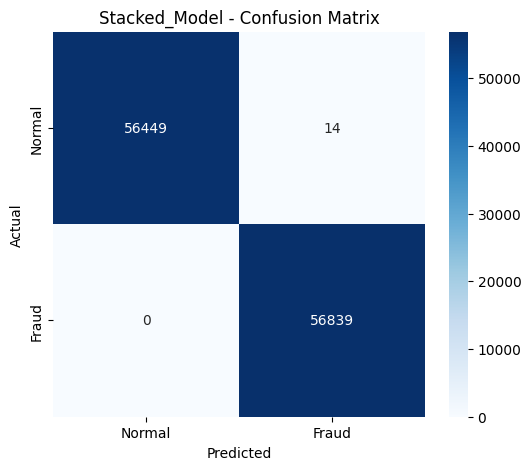

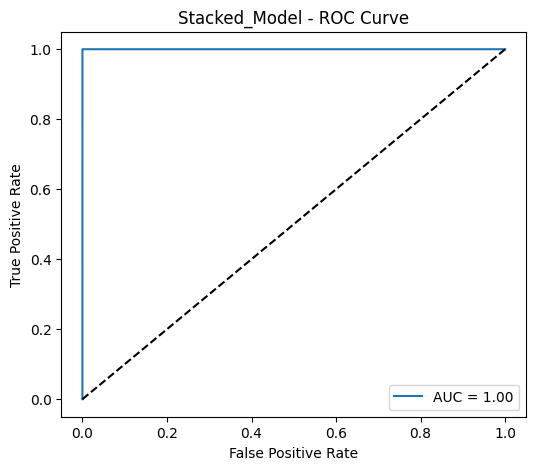

AUC Score: 1.00


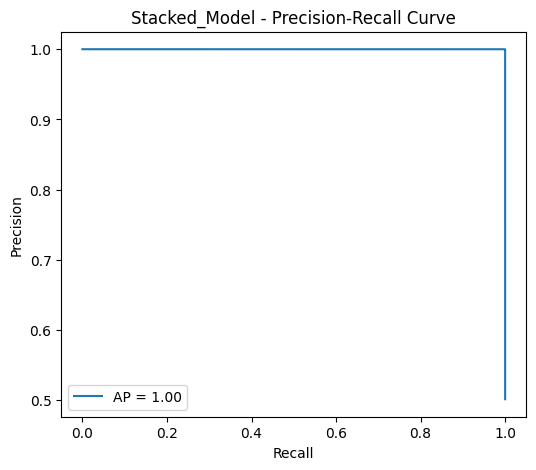

Average Precision (PR-AUC): 1.00


In [187]:
# Apply the function evaluate_models to the smote data
evaluate_models(x_train, y_train, x_test, y_test)

Model: Isolation_Forest
Classification Report:
              precision    recall  f1-score   support

      Normal       0.56      0.99      0.71     56463
       Fraud       0.95      0.22      0.36     56839

    accuracy                           0.60    113302
   macro avg       0.75      0.60      0.53    113302
weighted avg       0.75      0.60      0.53    113302



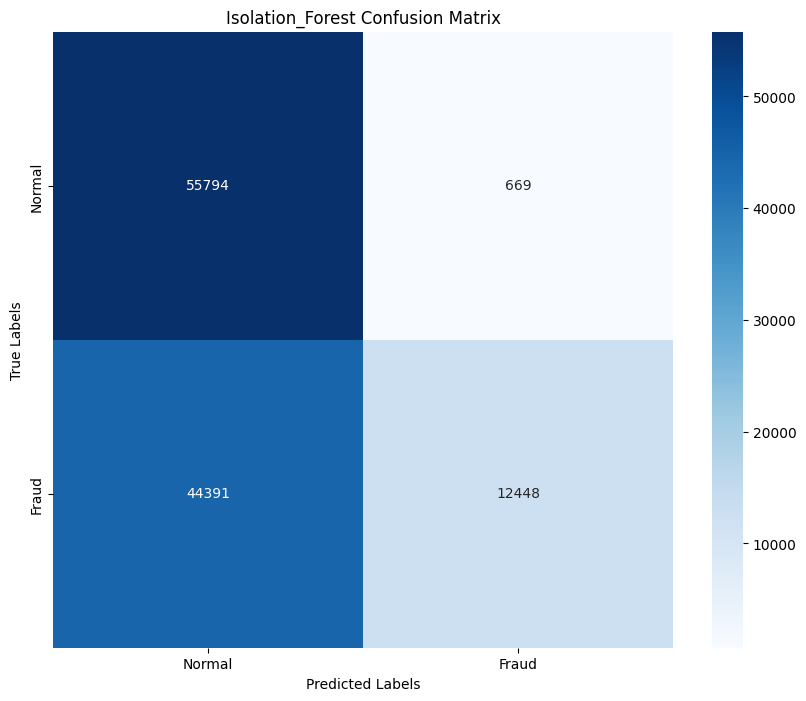

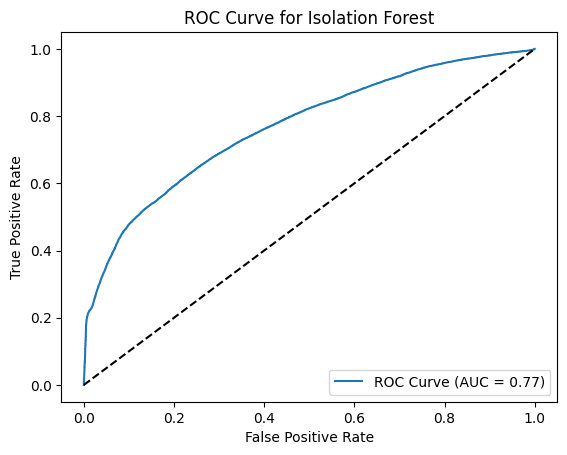

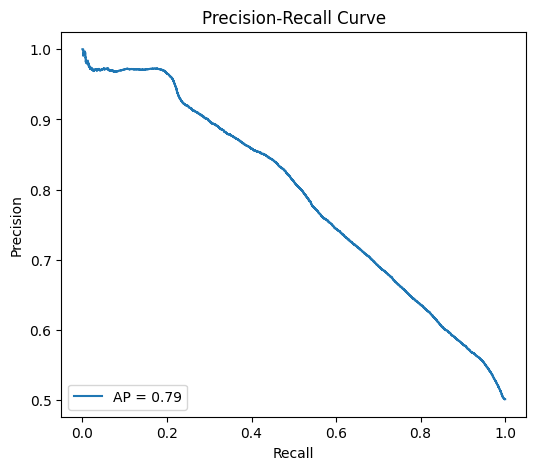

Average Precision (PR-AUC): 0.79


In [189]:
# Apply the function isolation_forest_model to the smote data
isolation_forest_model(x_train, x_test, y_test)

Epoch 1/30
1594/1594 - 12s - 8ms/step - accuracy: 0.9699 - loss: 0.0978 - val_accuracy: 0.9957 - val_loss: 0.0287
Epoch 2/30
1594/1594 - 11s - 7ms/step - accuracy: 0.9928 - loss: 0.0332 - val_accuracy: 0.9978 - val_loss: 0.0183
Epoch 3/30
1594/1594 - 7s - 5ms/step - accuracy: 0.9952 - loss: 0.0252 - val_accuracy: 0.9986 - val_loss: 0.0147
Epoch 4/30
1594/1594 - 10s - 6ms/step - accuracy: 0.9959 - loss: 0.0222 - val_accuracy: 0.9986 - val_loss: 0.0142
Epoch 5/30
1594/1594 - 11s - 7ms/step - accuracy: 0.9964 - loss: 0.0207 - val_accuracy: 0.9989 - val_loss: 0.0132
Epoch 6/30
1594/1594 - 11s - 7ms/step - accuracy: 0.9965 - loss: 0.0196 - val_accuracy: 0.9987 - val_loss: 0.0136
Epoch 7/30
1594/1594 - 7s - 4ms/step - accuracy: 0.9968 - loss: 0.0189 - val_accuracy: 0.9987 - val_loss: 0.0134
Epoch 8/30
1594/1594 - 8s - 5ms/step - accuracy: 0.9967 - loss: 0.0189 - val_accuracy: 0.9992 - val_loss: 0.0117
Epoch 9/30
1594/1594 - 10s - 6ms/step - accuracy: 0.9968 - loss: 0.0186 - val_accuracy: 0.9

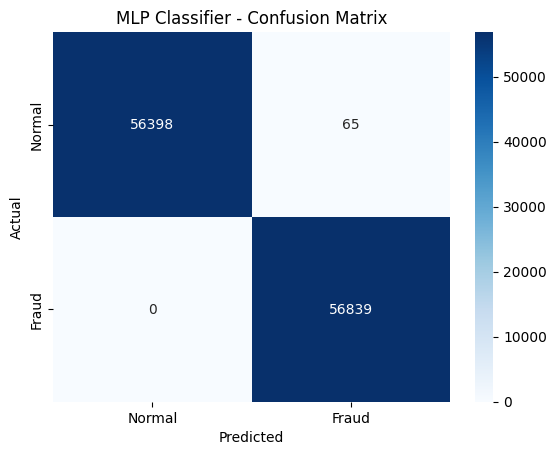

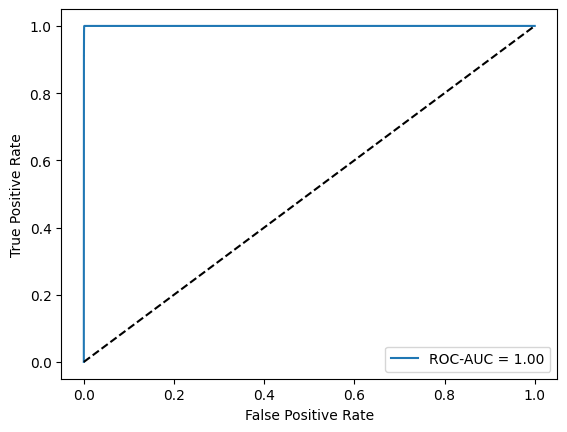

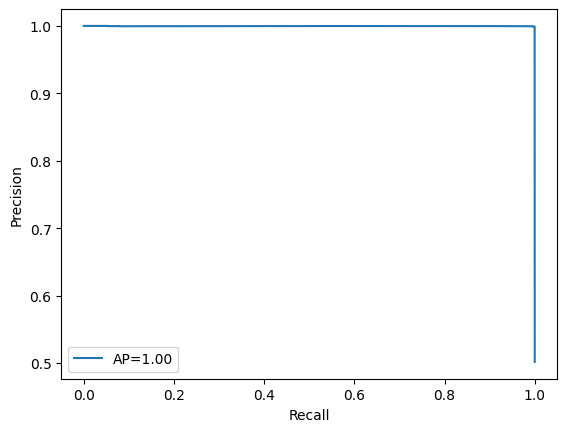

(<Sequential name=sequential, built=True>,
 <keras.src.callbacks.history.History at 0x7efaeb3da410>)

In [190]:
# Apply the function build_mlp to the smote data
mlp_model, mlp_history = build_mlp(x_train, y_train, x_test, y_test)
mlp_model, mlp_history